# Logistic Regression

### Imports

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    MinMaxScaler, 
    RobustScaler,
    StandardScaler,
    OneHotEncoder,
    KBinsDiscretizer
)

# Plotting
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]= (15, 5)

### load and prepare the data frame

In [2]:
df = pd.read_csv('train.csv')
y = df['Survived']
X = df.drop('Survived', axis=1)
X.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


#### Split the data into training and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

## Feature Engineering

#### replace NANs by the median in 'Age'

In [4]:
from sklearn.impute import SimpleImputer
X_train.isna().sum()

Pclass        0
Sex           0
Age         127
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
imputer = SimpleImputer(strategy='median')
X_train['Age'] = imputer.fit_transform(X_train[['Age']])
X_test['Age'] = imputer.transform(X_test[['Age']])
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### replace NANs by the most frequent in 'Embarked'

In [6]:
imputer = SimpleImputer(strategy='most_frequent')
X_train['Embarked'] = imputer.fit_transform(X_train[['Embarked']])
X_test['Embarked'] = imputer.transform(X_test[['Embarked']])
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Scaling

In [7]:
scaler = MinMaxScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']]) 
X_test['Age'] = scaler.transform(X_test[['Age']])

Text(0.5, 0, 'Age')

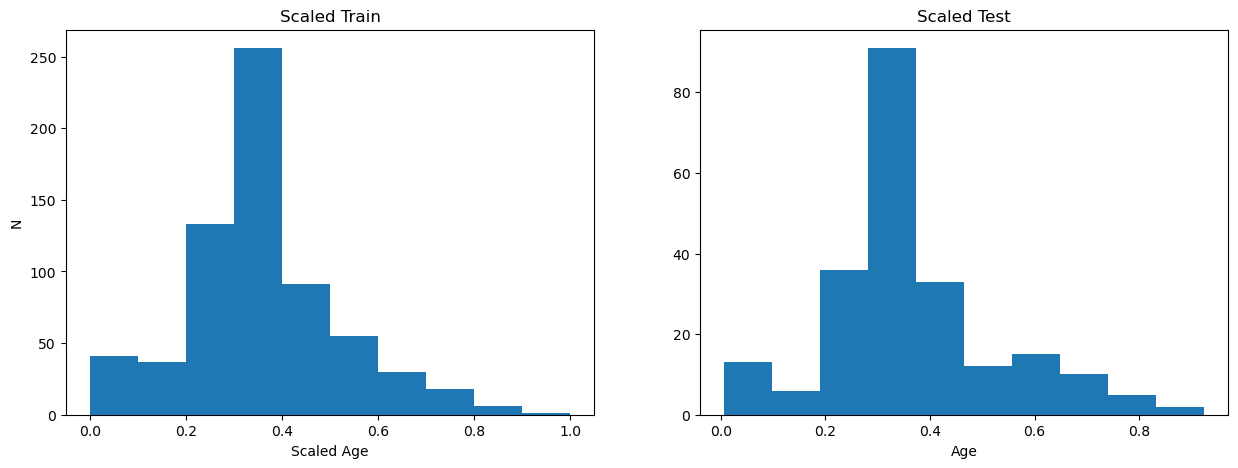

In [8]:
plt.subplot(1, 2, 1)
plt.hist(X_train['Age'], density=False)
plt.title('Scaled Train')
plt.ylabel('N')
plt.xlabel('Scaled Age')

plt.subplot(1, 2, 2)
plt.hist(X_test['Age'], density=False)
plt.title('Scaled Test')
plt.xlabel('Age')

In [9]:
X_train['Fare'] = scaler.fit_transform(X_train[['Fare']]) 
X_test['Fare'] = scaler.transform(X_test[['Fare']])

In [10]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
578,3,female,0.346569,1,0,0.028221,C
323,2,female,0.271174,1,1,0.056604,S
654,3,female,0.220910,0,0,0.013175,Q
157,3,male,0.371701,0,0,0.015713,S
692,3,male,0.346569,0,0,0.110272,S
...,...,...,...,...,...,...,...
369,1,female,0.296306,0,0,0.135265,C
320,3,male,0.271174,0,0,0.014151,S
527,1,male,0.346569,0,0,0.432884,S
125,3,male,0.145514,1,0,0.021942,C


#### One-Hot Encoding

In [11]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

In [12]:
X_train['Sex'] = ohe.fit_transform(X_train[['Sex']]).todense()
X_test['Sex'] = ohe.transform(X_test[['Sex']]).todense()

In [13]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
578,3,0.0,0.346569,1,0,0.028221,C
323,2,0.0,0.271174,1,1,0.056604,S
654,3,0.0,0.220910,0,0,0.013175,Q
157,3,1.0,0.371701,0,0,0.015713,S
692,3,1.0,0.346569,0,0,0.110272,S
...,...,...,...,...,...,...,...
369,1,0.0,0.296306,0,0,0.135265,C
320,3,1.0,0.271174,0,0,0.014151,S
527,1,1.0,0.346569,0,0,0.432884,S
125,3,1.0,0.145514,1,0,0.021942,C


In [14]:
X_train['Embarked'] = ohe.fit_transform(X_train[['Embarked']]).todense()
X_test['Embarked'] = ohe.transform(X_test[['Embarked']]).todense()

In [15]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
578,3,0.0,0.346569,1,0,0.028221,0.0
323,2,0.0,0.271174,1,1,0.056604,0.0
654,3,0.0,0.220910,0,0,0.013175,1.0
157,3,1.0,0.371701,0,0,0.015713,0.0
692,3,1.0,0.346569,0,0,0.110272,0.0
...,...,...,...,...,...,...,...
369,1,0.0,0.296306,0,0,0.135265,0.0
320,3,1.0,0.271174,0,0,0.014151,0.0
527,1,1.0,0.346569,0,0,0.432884,0.0
125,3,1.0,0.145514,1,0,0.021942,0.0


#### Binning

In [16]:
kbins = KBinsDiscretizer(n_bins=8, encode='onehot-dense', strategy='quantile')
binned_train_age = kbins.fit_transform(X_train[['Age']])
binned_test_age = kbins.transform(X_test[['Age']])

In [17]:
df_bins_train_age = pd.DataFrame(binned_train_age, columns=kbins.get_feature_names_out())
df_bins_test_age = pd.DataFrame(binned_test_age, columns=kbins.get_feature_names_out())

In [18]:
df_bins_train_age.index = X_train.index
df_bins_test_age.index = X_test.index

In [19]:
X_test.drop('Age',axis=1,inplace=True)
X_train.drop('Age',axis=1,inplace=True)  

In [20]:
X_train = pd.concat([X_train,df_bins_train_age], axis=1)
X_test = pd.concat([X_test,df_bins_test_age], axis=1)

In [21]:
log_R = LogisticRegression()
log_R.fit(X_train, y_train)

LogisticRegression()

In [22]:
log_R.score(X_train,y_train)

0.8008982035928144

In [23]:
log_R.score(X_test,y_test)

0.8026905829596412